# Part One

### 1

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('seeds.xlsx')
# df.to_csv('seeds.csv')
df.shape

(210, 8)

### 2

In [13]:
c = df.iloc[:, -1]
X = df.iloc[:, :-1]

In [14]:
X.columns

Index(['area', 'perimeter', 'compactness', 'kernellength', 'kernelwidth',
       'asymmetrycoefficient', 'kernelgroove'],
      dtype='object')

# Part Two

### 3

In [15]:
covariance_matrix = X.cov()

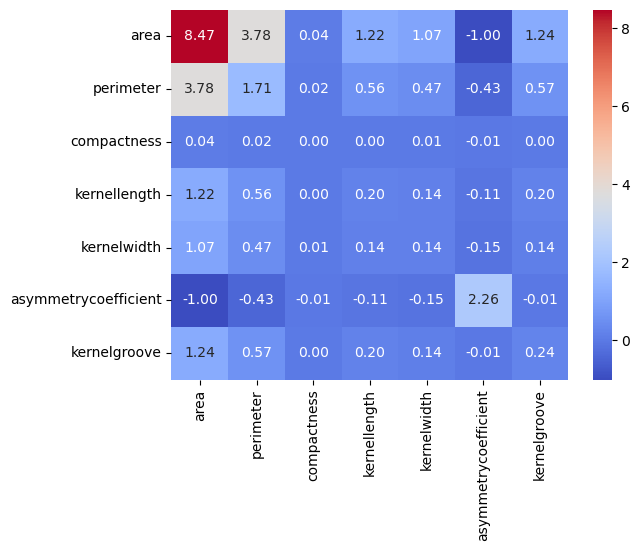

In [16]:
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f');

### 4

In [17]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [18]:
eig_vals

array([1.07933269e+01, 2.12945512e+00, 7.36300330e-02, 1.28874947e-02,
       2.74822668e-03, 1.57044980e-03, 2.96554425e-05])

In [19]:
eig_vecs

array([[-0.8842285 ,  0.10080577, -0.26453354, -0.19944949, -0.13717297,
         0.28063956, -0.02539824],
       [-0.39540542,  0.05648963,  0.28251995,  0.57881686,  0.57475603,
        -0.30155864,  0.0658399 ],
       [-0.00431132, -0.00289474, -0.05903584, -0.05776023, -0.05310454,
        -0.04522905,  0.99412565],
       [-0.12854448,  0.03062173,  0.40014946,  0.43610024, -0.78699776,
        -0.11343761,  0.00143143],
       [-0.11105914,  0.00237229, -0.31923869, -0.23416358, -0.1448029 ,
        -0.89626785, -0.0815499 ],
       [ 0.12761562,  0.98941048, -0.06429754,  0.02514736, -0.00157564,
         0.003288  ,  0.00114269],
       [-0.1289665 ,  0.08223339,  0.76193973, -0.61335659,  0.08765361,
        -0.10992364,  0.00897193]])

### 5

In [20]:
idx = np.argsort(eig_vals)[::-1]
eig_vecs = eig_vecs[:, idx]
eigvals = eig_vals[idx]
eigvecs = eig_vecs[:, idx]

In [21]:
W = eigvecs[:, :2]
Z = X @ W
Z

,0,1
0,-20.863299,5.185150
1,-20.515517,3.913242
2,-19.539351,5.470965
3,-19.144575,4.981281
4,-21.819850,4.419086
...,...,...
205,-17.157978,6.129345
206,-16.090788,6.711812
207,-17.699817,10.910436
208,-16.867772,6.077181


### 6

In [22]:
Z.columns = ['a', 'b']

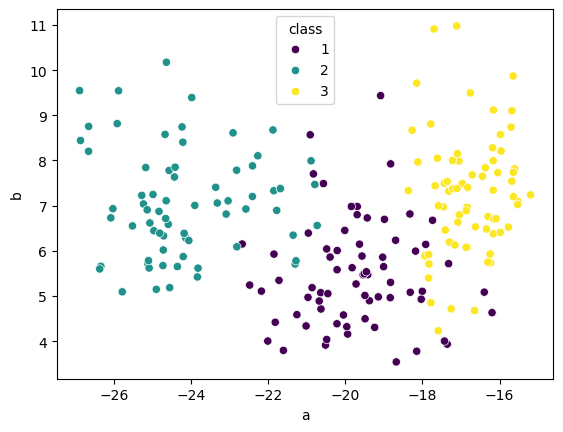

In [23]:
sns.scatterplot(data=Z, x='a', y='b', hue=c, palette='viridis');

### 7

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Z = pca.fit_transform(X)

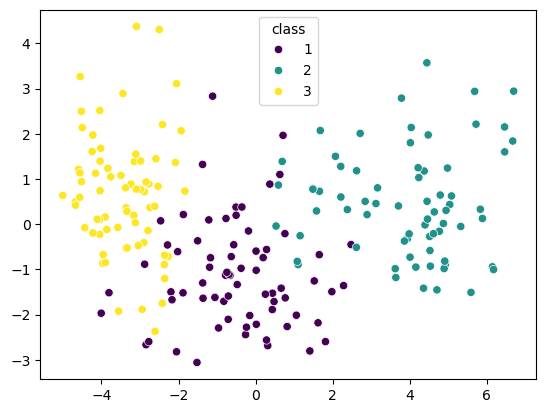

In [25]:
sns.scatterplot(x=Z[:, 0], y=Z[:, 1], hue=c, palette='viridis');

### 8

In [26]:
eigvals[:2].sum()

12.922782035961518

In [27]:
eigvals.sum()

13.01364789558829

In [28]:
e = 1 - eigvals[:2].sum() / eigvals.sum()
e

0.006982351171309631

### 9

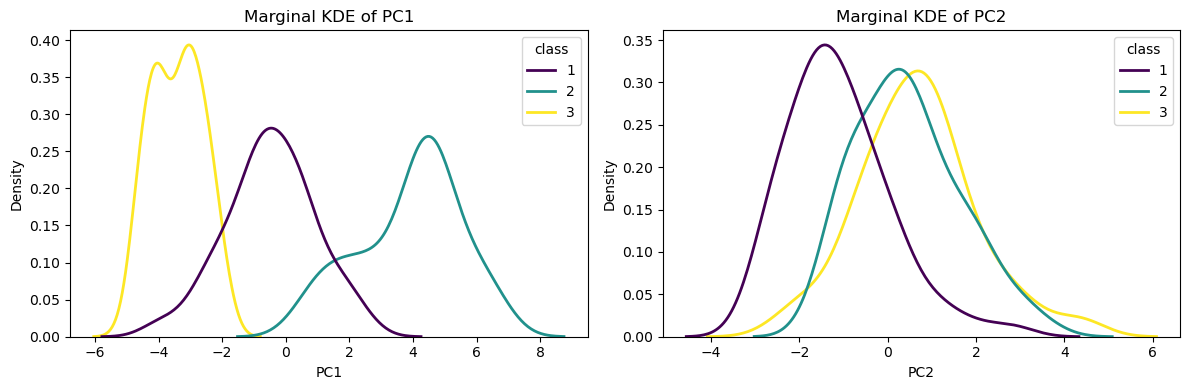

In [29]:
Z_df = pd.DataFrame({
    'PC1': Z[:, 0],
    'PC2': Z[:, 1],
    'class': c
})


fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

sns.kdeplot(
    data=Z_df, x='PC1', hue='class', common_norm=False,
    fill=False, linewidth=2, ax=axes[0], palette='viridis'
)
axes[0].set_title('Marginal KDE of PC1')
axes[0].set_xlabel('PC1')

sns.kdeplot(
    data=Z_df, x='PC2', hue='class', common_norm=False,
    fill=False, linewidth=2, ax=axes[1], palette='viridis'
)
axes[1].set_title('Marginal KDE of PC2')
axes[1].set_xlabel('PC2')

plt.tight_layout()
plt.show()

# Part Three

### 10

In [30]:
def mean_cov(arr):
    mu = arr.mean(axis=0)
    N = arr.shape[0]
    xc = arr - mu
    sigma = (xc.T @ xc) / (N - 1)
    return mu, sigma

In [31]:
total_mu, total_Sigma = mean_cov(Z_df.iloc[:, :-1].values)
print("Mean:", total_mu)
print("Covariance Matrix:", total_Sigma)

Mean: [-5.41365894e-15 -7.10542736e-16]
Covariance Matrix: [[1.07933269e+01 1.58383753e-14]
 [1.58383753e-14 2.12945512e+00]]


In [32]:
class_mu_sig = {}
for i in Z_df['class'].unique():
    class_data = Z_df[Z_df['class'] == i].iloc[:, :-1].values
    mu, sigma = mean_cov(class_data)
    class_mu_sig[i] = {'mu': mu, 'sigma': sigma}
    print(f"Class {i}:")
    print("Mean:", mu)
    print("Covariance Matrix:", sigma)

Class 1:
Mean: [-0.48505414 -1.11868774]
Covariance Matrix: [[ 1.91090387 -0.01015799]
 [-0.01015799  1.36098387]]
Class 2:
Mean: [3.90583319 0.45295876]
Covariance Matrix: [[2.54870834 0.07262228]
 [0.07262228 1.38758624]]
Class 3:
Mean: [-3.42077905  0.66572899]
Covariance Matrix: [[ 0.64658404 -0.09745791]
 [-0.09745791  1.77415583]]


### 11

In [33]:
sigma_invs = {}
for i in Z_df['class'].unique():
    sig_inv = np.linalg.inv(class_mu_sig[i]['sigma'])
    sigma_invs[f'sigma{i}_inv'] = sig_inv
sigma_invs

{'sigma1_inv': array([[0.52333333, 0.00390601],
        [0.00390601, 0.73479172]]),
 'sigma2_inv': array([[ 0.39294159, -0.02056543],
        [-0.02056543,  0.72175226]]),
 'sigma3_inv': array([[1.55950166, 0.08566653],
        [0.08566653, 0.56835418]])}

### 12

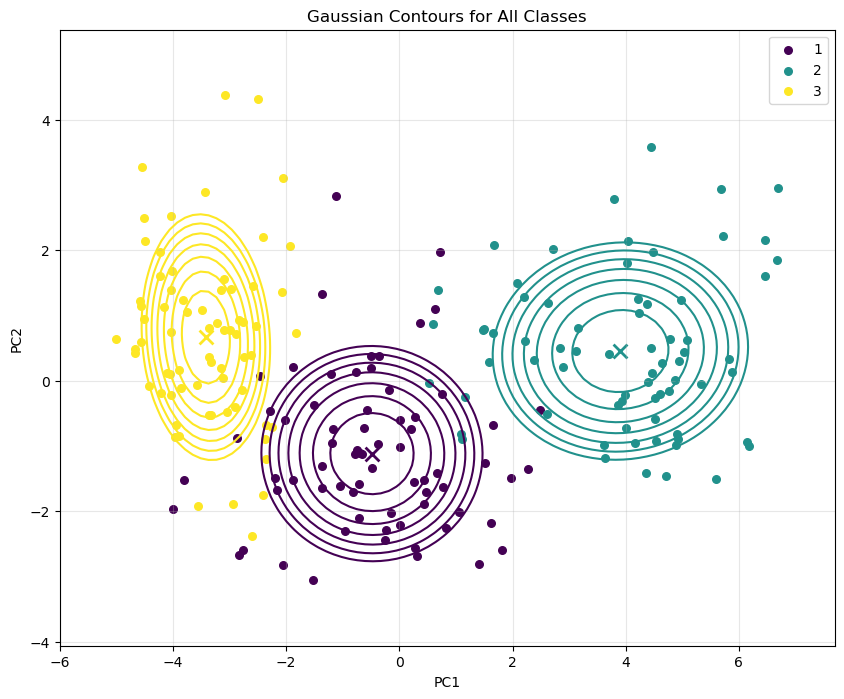

In [34]:
x1_min, x1_max = Z_df['PC1'].min() - 1, Z_df['PC1'].max() + 1
x2_min, x2_max = Z_df['PC2'].min() - 1, Z_df['PC2'].max() + 1
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                     np.linspace(x2_min, x2_max, 100))
grid = np.vstack([x1.ravel(), x2.ravel()]).T

plt.figure(figsize=(10, 8))
k_values = np.linspace(0, 1, 8)
class_colors = plt.cm.viridis(np.linspace(0, 1, len(class_mu_sig)))

for idx, (class_label, params) in enumerate(class_mu_sig.items()):
    mu = params['mu']
    sigma_inv = sigma_invs[f'sigma{class_label}_inv']
    
    diff = grid - mu
    dist = np.sum(diff @ sigma_inv * diff, axis=1).reshape(x1.shape)
    
    base_color = class_colors[idx]
    for k in k_values:
        plt.contour(x1, x2, dist, levels=[k*2], colors=[base_color])
    
    class_data = Z_df[Z_df['class'] == class_label]
    plt.scatter(class_data['PC1'], class_data['PC2'], 
               c=[base_color], label=idx+1, s=30)
    plt.scatter(mu[0], mu[1], c=[base_color], marker='x', s=100, linewidth=2)

plt.title('Gaussian Contours for All Classes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Part 4

### 14

In [35]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import minmax_scale
from minisom import MiniSom

iris = load_iris()
data = minmax_scale(iris.data, feature_range=(0, 1))
labels = iris.target
target_names = iris.target_names
n_features = data.shape[1]

In [36]:
som = MiniSom(10, 10, n_features, 
              sigma=1.5,
              learning_rate=0.5,
              neighborhood_function='gaussian',
              random_seed=42)

som.random_weights_init(data)
som.train_random(data, 500)

### 15

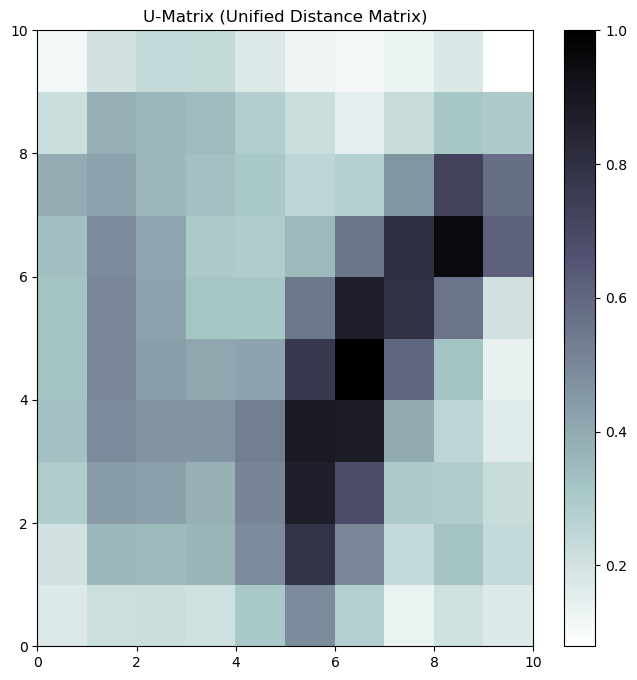

In [37]:
plt.figure(figsize=(8, 8))
u_matrix = som.distance_map()
plt.pcolor(u_matrix.T, cmap='bone_r') 
plt.colorbar()
plt.title('U-Matrix (Unified Distance Matrix)')
plt.show()

### 16

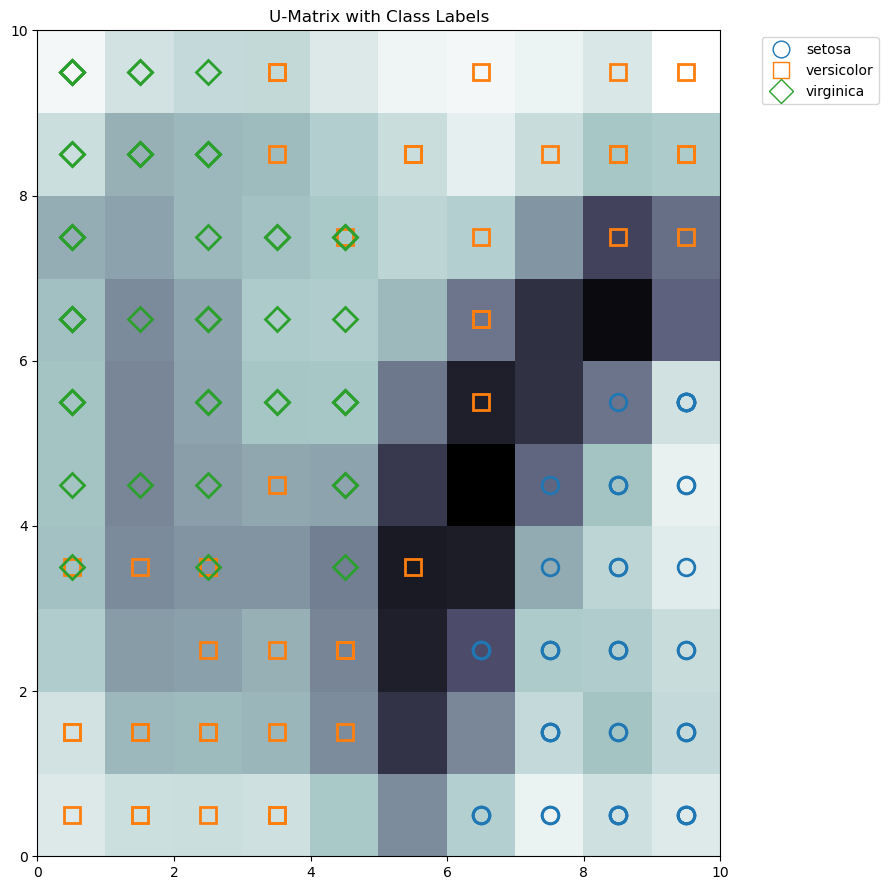

In [38]:
plt.figure(figsize=(9, 9))
plt.pcolor(u_matrix.T, cmap='bone_r')

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2'] 

for i, x in enumerate(data):
    w = som.winner(x) 
    plt.plot(w[0] + 0.5, w[1] + 0.5, 
             markers[labels[i]],
             markerfacecolor='None', 
             markeredgecolor=colors[labels[i]],
             markersize=12,
             markeredgewidth=2)

legend_elements = [plt.Line2D([0], [0], marker=m, color='w', label=l,
                            markerfacecolor='None', markeredgecolor=c, markersize=12)
                  for m, c, l in zip(markers, colors, target_names)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('U-Matrix with Class Labels')
plt.tight_layout()
plt.savefig('u_matrix_with_labels.png')

### 17


Winning neuron coordinates for first 10 samples:
Sample 0 (Class 0): (7, 1)
Sample 1 (Class 0): (9, 5)
Sample 2 (Class 0): (9, 3)
Sample 3 (Class 0): (7, 4)
Sample 4 (Class 0): (7, 1)
Sample 5 (Class 0): (8, 0)
Sample 6 (Class 0): (8, 2)
Sample 7 (Class 0): (7, 2)
Sample 8 (Class 0): (8, 4)
Sample 9 (Class 0): (9, 5)


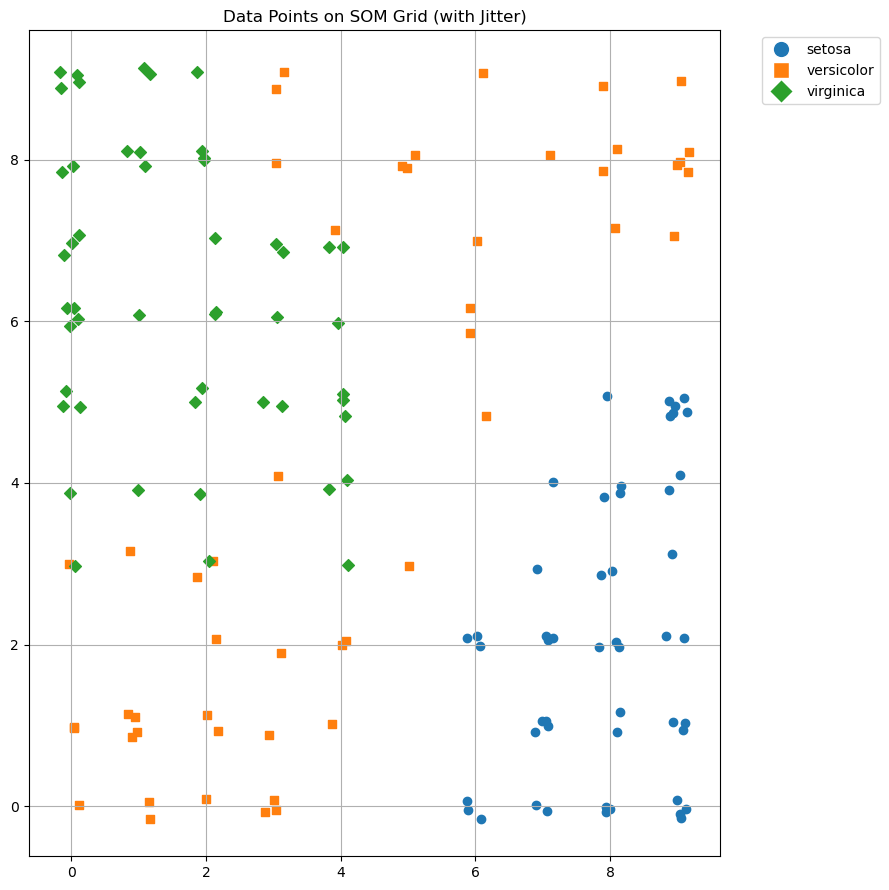

In [39]:
plt.figure(figsize=(9, 9))
jitter = 0.35

for i, x in enumerate(data):
    w = som.winner(x)
    x_coord = w[0] + np.random.rand() * jitter - (jitter / 2)
    y_coord = w[1] + np.random.rand() * jitter - (jitter / 2)
    plt.scatter(x_coord, y_coord, 
               c=[colors[labels[i]]],
               marker=markers[labels[i]])

plt.title('Data Points on SOM Grid (with Jitter)')
legend_elements = [plt.Line2D([0], [0], marker=m, color='w', label=l,
                            markerfacecolor=c, markersize=12)
                  for m, c, l in zip(markers, colors, target_names)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

print("\nWinning neuron coordinates for first 10 samples:")
for i in range(10):
    print(f"Sample {i} (Class {labels[i]}): {som.winner(data[i])}")